In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_1='data/city_data.csv'
file_2='data/ride_data.csv'

In [3]:
city_df=pd.read_csv(file_1)
ride_df=pd.read_csv(file_2)

In [4]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [6]:
# ride_df group by city
new_ride_df=ride_df.groupby(['city'])

In [7]:
# calculate ride counts per city
ride_count=new_ride_df['ride_id'].count()
ride_count

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [8]:
#calculate average fare per city
avg_fare=new_ride_df['fare'].mean()
avg_fare

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [9]:
#calculate total fare per city
total_fare=new_ride_df['fare'].sum()
total_fare

city
Amandaburgh              443.55
Barajasview              557.31
Barronchester            582.76
Bethanyland              593.21
Bradshawfurt             400.64
Brandonfort              673.31
Carriemouth              764.49
Christopherfurt          661.55
Colemanland              679.68
Davidfurt                543.93
Deanville                491.01
East Aaronbury           230.95
East Danielview          536.53
East Kaylahaven          688.98
East Kentstad            387.70
East Marymouth           832.55
Erikaland                298.88
Garzaport                 72.37
Grahamburgh              630.53
Grayville                416.45
Harringtonfort           200.82
Huntermouth              695.85
Hurleymouth              724.96
Jerryton                 641.23
Jessicaport              216.08
Johnton                  562.50
Joneschester             557.24
Josephside               887.17
Justinberg               710.83
Karenberg                447.78
                         ...   
Sou

In [10]:
# make a new table combining city, ride count and average ride fare
city_count_avgfare_df=pd.DataFrame({'ride count': ride_count,'average ride fare': avg_fare,'total fare':total_fare})
city_count_avgfare_df.head()

,ride count,average ride fare,total fare
city,,,
Amandaburgh,18,24.641667,443.55
Barajasview,22,25.332273,557.31
Barronchester,16,36.422500,582.76
Bethanyland,18,32.956111,593.21
Bradshawfurt,10,40.064000,400.64


In [11]:
# reset index
new_index_city_count_avgfare_df=city_count_avgfare_df.reset_index(inplace=False,drop=False)
new_index_city_count_avgfare_df.head()

,city,ride count,average ride fare,total fare
0,Amandaburgh,18,24.641667,443.55
1,Barajasview,22,25.332273,557.31
2,Barronchester,16,36.422500,582.76
3,Bethanyland,18,32.956111,593.21
4,Bradshawfurt,10,40.064000,400.64


In [12]:
# merge city_df and new_index_city_count_avgfare_df
new_city_df=pd.merge(city_df,new_index_city_count_avgfare_df, on='city')
new_city_df.head()

,city,driver_count,type,ride count,average ride fare,total fare
0,Richardfort,38,Urban,28,22.373214,626.45
1,Williamsstad,59,Urban,23,24.362174,560.33
2,Port Angela,67,Urban,19,23.836842,452.90
3,Rodneyfort,34,Urban,23,28.616957,658.19
4,West Robert,39,Urban,31,25.123871,778.84


In [13]:
urban_df=new_city_df[new_city_df['type']=='Urban']
suburban_df=new_city_df[new_city_df['type']=='Suburban']
rural_df=new_city_df[new_city_df['type']=='Rural']

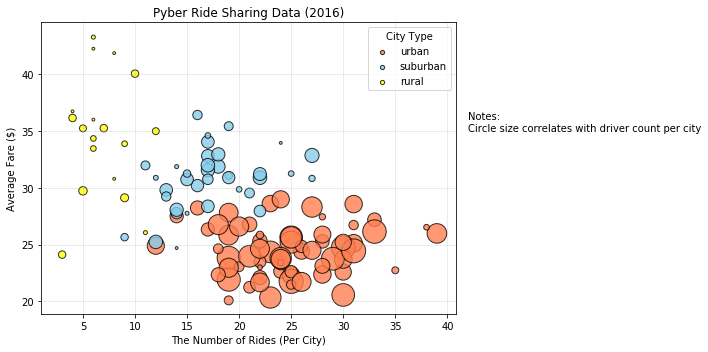

In [14]:
plt.figure(figsize=(10,5))
urban=plt.scatter(urban_df['ride count'],urban_df['average ride fare'],s=8*urban_df['driver_count'],c='coral',marker='o',edgecolor='black',alpha=0.8)
suburban=plt.scatter(suburban_df['ride count'],suburban_df['average ride fare'],s=8*suburban_df['driver_count'],c='skyblue',marker='o',edgecolor='black',alpha=0.8)
rural=plt.scatter(rural_df['ride count'],rural_df['average ride fare'],s=8*rural_df['driver_count'],c='yellow',marker='o',edgecolor='black',alpha=0.8)

buble_plot=plt.legend((urban,suburban,rural),('urban','suburban','rural'),loc='best',title='City Type')
# set the maker of the legends to the same size
buble_plot.legendHandles[0]._sizes = [18]
buble_plot.legendHandles[1]._sizes = [18]
buble_plot.legendHandles[2]._sizes = [18]
plt.xlabel('The Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid(alpha=0.3)
plt.text(42,35,'Notes: \nCircle size correlates with driver count per city')
plt.tight_layout()
plt.savefig('pieber_buble_chart.png',dpi=1200)

In [15]:
groupby_new_city_df=new_city_df.groupby(['type'])
#toal fare per type
gross_fare=groupby_new_city_df['total fare'].sum()

In [16]:
# total rides per type
gross_ride=groupby_new_city_df['ride count'].sum()

In [17]:
# total drive per type
gross_driver=groupby_new_city_df['driver_count'].sum()

In [18]:
#make a new datafram to store above calculations
type_df=pd.DataFrame({'Total Fare': gross_fare,'Total Ride Count':gross_ride,'Total Driver Count':gross_driver})
new_type_df=type_df.reset_index(inplace=False,drop=False)
new_type_df

,type,Total Fare,Total Ride Count,Total Driver Count
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


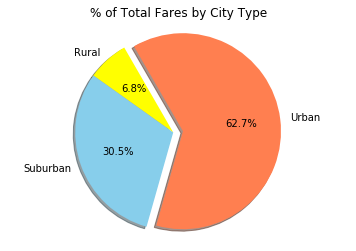

In [19]:
plt.pie(new_type_df['Total Fare'],
        explode=(0,0,0.1),
        colors=['yellow','skyblue','coral'],
        startangle=120,
        labels=new_type_df['type'],
        shadow=True,autopct='%.1f%%')
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.savefig('total_fare_city_type.png')

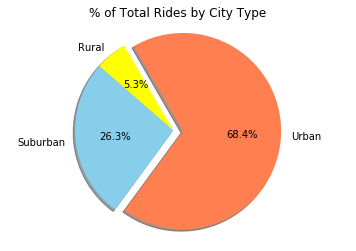

In [20]:
#plt.clf()
plt.pie(new_type_df['Total Ride Count'],
        explode=(0,0,0.1),
        colors=['yellow','skyblue','coral'],
        startangle=120,
        labels=new_type_df['type'],
        shadow=True,autopct='%.1f%%')
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.savefig('total_rides_city_type.png')

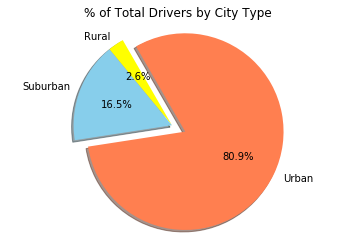

In [21]:
#plt.clf()
plt.pie(new_type_df['Total Driver Count'],
        explode=(0,0,0.15),
        colors=['yellow','skyblue','coral'],
        startangle=120,
        labels=new_type_df['type'],
        shadow=True,autopct='%.1f%%')
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.savefig('total_drivers_city_type.png')